In [1]:
%matplotlib notebook

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import simulations

In [5]:
from functools import partial

### Simple situation without overtaking

In [6]:
A = np.array([0.5,0.5])
opt = np.array([10,6])
kap = 10
K=np.array([1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om)

In [7]:
t, v = simulations.euler(initial_time=0, end_time=20, number_of_points=1000000, initial_value=np.array([5,0,1,1]), derivative=d)

<IPython.core.display.Javascript object>


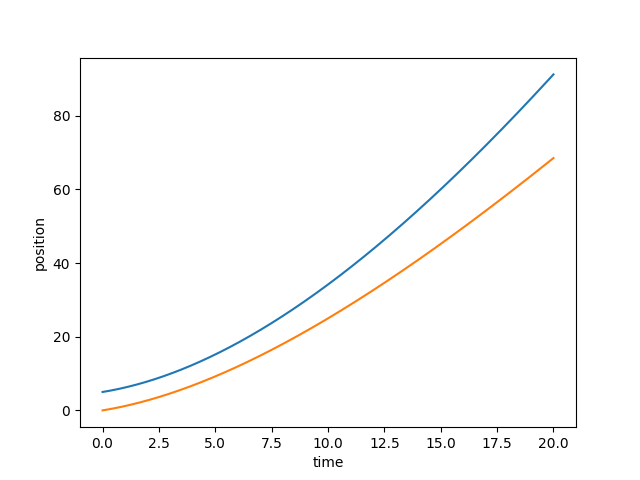

In [8]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Simple situation with overtaking

In [9]:
A = np.array([0.5,0.5])
opt = np.array([6,10])
kap = 5
K=np.array([1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om)

In [10]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([5,0,1,1]), derivative=d)

<IPython.core.display.Javascript object>


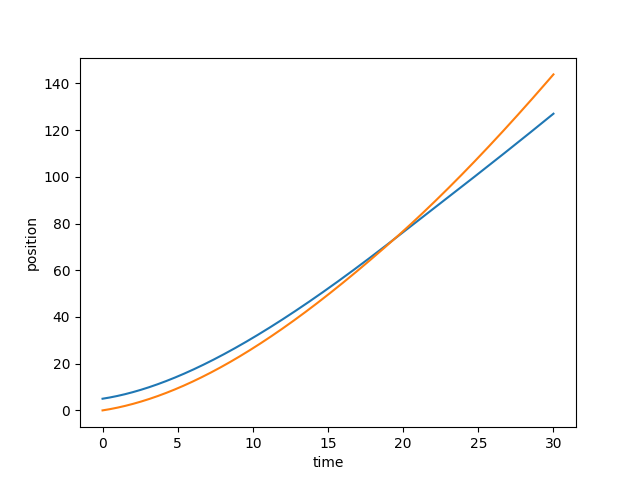

In [11]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Example of more complicated situation:

In [12]:
A = np.array([0.5,0.5,0.5,0.5])
opt = np.array([6,10,3,5])
kap = 10
K=np.array([1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om)

In [13]:
t, v = simulations.euler(initial_time=0, end_time=40, number_of_points=1000000, initial_value=np.array([5,4,3,2,6,3,8,3]), derivative=d)

<IPython.core.display.Javascript object>


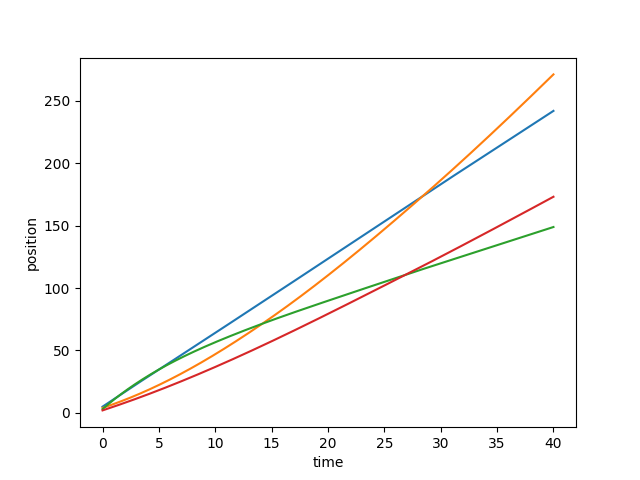

In [14]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### What if every drone flies with its' optimal velocity at the beginning?

In [15]:
A = np.array([0.5,0.5,0.5,0.5])
opt = np.array([5,6,7,8])
kap = 10
K=np.array([1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om)

In [16]:
t, v = simulations.euler(initial_time=0, end_time=21, number_of_points=1000000, initial_value=np.array([3,2,1,0,5,6,7,8]), derivative=d)

<IPython.core.display.Javascript object>


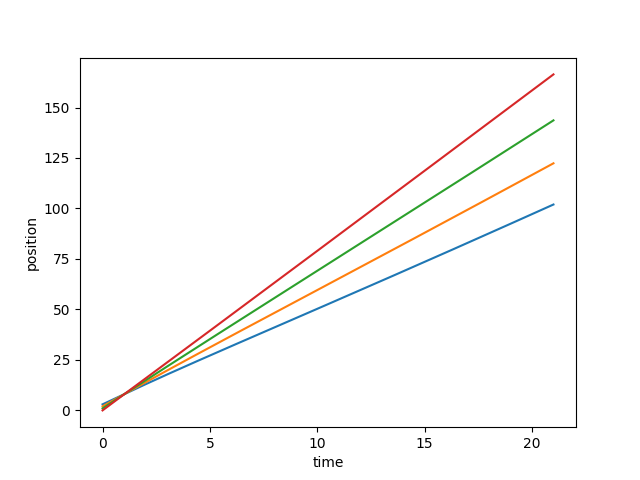

In [17]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### What happens if K=kappa for one of the drones?

Sometimes this drone will block the other drones:

In [18]:
A = np.array([0.5,0.5])
opt = np.array([2,10])
kap = 5
K=np.array([5,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om)

In [19]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([5,0,2,2]), derivative=d)

<IPython.core.display.Javascript object>


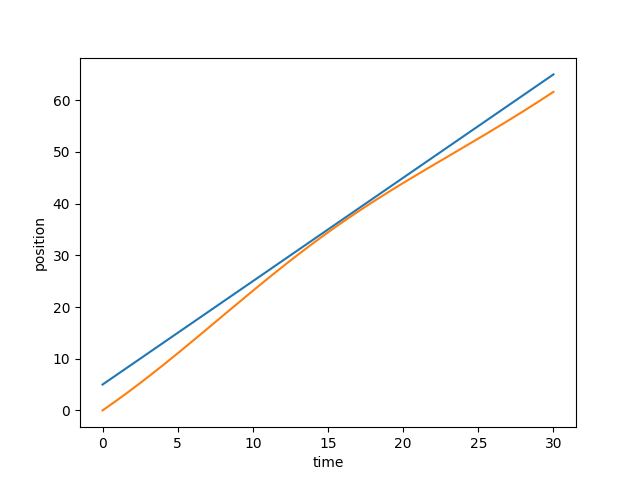

In [20]:
plt.plot(t,v[:,0],)
plt.plot(t,v[:,1])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

But sometimes it won't:

In [21]:
A = np.array([0.5,0.5])
opt = np.array([0.01,2])
kap = 5
K=np.array([5,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om)

In [22]:
t, v = simulations.euler(initial_time=0, end_time=20, number_of_points=1000000, initial_value=np.array([5,0,0.01,1]), derivative=d)

<IPython.core.display.Javascript object>


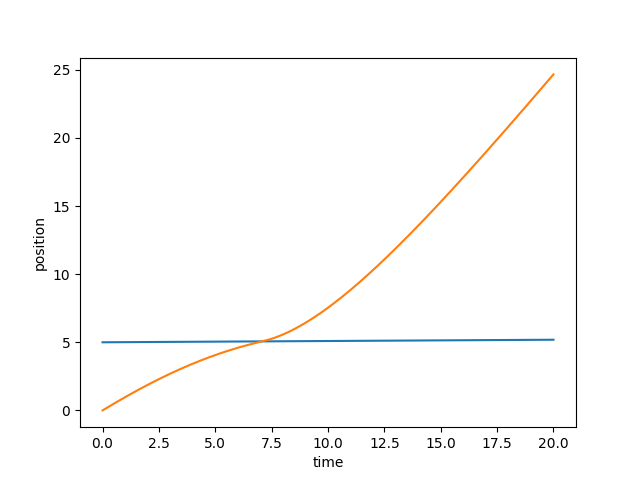

In [23]:
plt.plot(t,v[:,0],)
plt.plot(t,v[:,1])
plt.xlabel("time")
plt.ylabel("position")
plt.show()